# [Data Analysis Professional Nanodegree Program](https://udacity.com) 
## Wrangle and Analyze Data

### [Weratedogs](https://twitter.com/dog_rates) Project 
##### *By Ahmed El-feel*

### Table of Contents
1. [Project Introduction](#Project-Introduction)  
  
  
2. [Gathering Data](#Gathering-Data)
    - [Gathering From a CSV File](#Gathering-The-Archieved-Data-From-CSV-File)
    - [Downloading a TSV File](#Gathering-The-Image-Predictions-File-Data-From-TSV-File)
    - [Gathering Through an API](#Gathering-Retweets-Favorites-and-Counts-Data-From-Twitter-API-Through-Tweepy)  
  
  
3. [Assessing Data](#Assessing-Data)
    - [Quality](#Quality)
        - [Visual Assessment](#Visual-Assessment)
        - [Programmatic Assessment](#Programmatic-Assessment)
    - [Tideness](#Tideness)  
  
  
4. [Cleaning Data](#Cleaning-Data)
    - [Joining The Three Tables](#Making-Copies-of-each-table)
    - [Using SQL](#Using-SQL)
    - [Using Pandas and Other Libraries](#Using-Pandas-and-Other-Libraries)
    - [Comparing The Two Data Frames](#Comparing-The-Two-Data-Frames)
      
      
5. [Storing Data](#Storing-Cleaned-Data)
    - [Store in a CSV File](#Store-in-a-CSV-File)
    - [Store into a Database](#Store-into-a-Database)  
    

6. [Analyze Data](#Analyzing-Data)
    - [Insight 1](#Insight-1)
    - [Insight 2](#Insight-2)
    - [Insight 3](#Insight-3)
    - [Insight 4](#Insight-4)
    - [Insight 5](#Insight-5)
    - [Insight 6](#Insight-6)

# Project Introduction

*The objective of this project is to wrangle and analyze several datasets of weratedogs twitter page data,
This would happen through five stages:*
- *Gathering the data from three different resources*
- *Assessing the data quality and tideness*
- *Cleaning it* 
- *Storing the cleaned data*
- *Performing different analysis and coming with outputs*

# Gathering Data

### Gathering The Archieved Data From a CSV File

In [4]:
import datetime as dt
import json
import numpy as np
import pandas as pd
import requests as re
import tweepy
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
# Reading the CSV file data
archieve = pd.read_csv('twitter-archive-enhanced-2.csv')
archieve.head(1)

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   

   rating_denominator     name doggo floofer pupper puppo  
0                  10  Phineas  None    None   None  None

In [6]:
archieve.sort_values('timestamp')
archieve.head(2)

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   
1  2017-08-01 00:17:27 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   
1  This is Tilly. She's just checking pup on you....                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   
1                       NaN                        NaN   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   

   rating_denominator     name doggo floofer pupper puppo  
0                  10  Phineas  None    None   None  None  
1                  10    Tilly  None    None   None  None

In [7]:
archieve.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

### Back to [Table of Contents](#Table-of-Contents)

### Gathering The Image Predictions File Data From TSV File

In [8]:
# Downloading the TSV file programatically
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = re.get(url)

In [9]:
with open('image-predictions.tsv',mode= 'wb') as file:
    file.write(response.content)

In [10]:
Image_prediction = pd.read_csv('image-predictions.tsv',sep = '\t')

In [11]:
Image_prediction.head(1)

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   

   img_num                      p1   p1_conf  p1_dog      p2   p2_conf  \
0        1  Welsh_springer_spaniel  0.465074    True  collie  0.156665   

   p2_dog                 p3   p3_conf  p3_dog  
0    True  Shetland_sheepdog  0.061428    True

### Back to [Table of Contents](#Table-of-Contents)

### Gathering Retweets Favorites and Counts Data From Twitter API Through [Tweepy](https://www.tweepy.org/)

In [12]:
# Entering API Credentials
consumer_key = 'consumer_key'
consumer_secret = 'consumer_secret'
access_token = 'access_token'
access_token_secret = 'access_token_secret'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth,parser = tweepy.parsers.JSONParser(),wait_on_rate_limit = True,wait_on_rate_limit_notify = True)

In [13]:
# Download the archieved tweets status objects through the API and storing them in a list
tweets_list = []
not_found = []
for tweet_id in archieve['tweet_id']:
    try:
        tweets_list.append(api.get_status(tweet_id))
    except Exception:
        not_found.append(tweet_id)  

Rate limit reached. Sleeping for: 412
Rate limit reached. Sleeping for: 422


In [14]:
# Number of tweets that was found
len(tweets_list)

2329

In [15]:
# Number of not found tweets
len(not_found)

27

In [16]:
# Tweets JSON Data
tweets_list

[{'created_at': 'Tue Aug 01 16:23:56 +0000 2017',
  'id': 892420643555336193,
  'id_str': '892420643555336193',
  'text': "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU",
  'truncated': False,
  'entities': {'hashtags': [],
   'symbols': [],
   'user_mentions': [],
   'urls': [],
   'media': [{'id': 892420639486877696,
     'id_str': '892420639486877696',
     'indices': [86, 109],
     'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
     'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
     'url': 'https://t.co/MgUWQ76dJU',
     'display_url': 'pic.twitter.com/MgUWQ76dJU',
     'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1',
     'type': 'photo',
     'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
      'medium': {'w': 540, 'h': 528, 'resize': 'fit'},
      'small': {'w': 540, 'h': 528, 'resize': 'fit'},
      'large': {'w': 540, 'h': 528, 

In [17]:
#This empty list in the cell would include each tweet and some interesting data
tweets = []
for tweet in tweets_list:
    tweet_id = tweet['id']
    followers_count = tweet['user']['followers_count']
    friends_count = tweet['user']['friends_count']
    favorite_count = tweet['favorite_count']
    retweet_count = tweet['retweet_count']
    created_at = pd.to_datetime(tweet['created_at'])
    
    tweets.append({'tweet_id': tweet_id
                 ,'followers_count': followers_count
                 ,'friends_count': friends_count
                 ,'favorite_count': favorite_count
                 ,'retweet_count': retweet_count
                 ,'created_at': created_at})
    tweets_json = pd.DataFrame(tweets, columns = ['tweet_id', 'followers_count','friends_count', 
                                                  'favorite_count', 'retweet_count','created_at'])

In [18]:
tweets_json

tweet_id  followers_count  friends_count  favorite_count  \
0     892420643555336193          8960766             17           35095   
1     892177421306343426          8960766             17           30380   
2     891815181378084864          8960766             17           22847   
3     891689557279858688          8960766             17           38365   
4     891327558926688256          8960766             17           36641   
...                  ...              ...            ...             ...   
2324  666049248165822465          8960779             17              94   
2325  666044226329800704          8960779             17             260   
2326  666033412701032449          8960779             17             107   
2327  666029285002620928          8960779             17             118   
2328  666020888022790149          8960779             17            2344   

      retweet_count                created_at  
0              7386 2017-08-01 16:23:56+00:00  
1              5500 2017-08-01 00:17:27+00:00  
2              3635 2017-07-31 00:18:03+00:00  
3              7562 2017-07-30 15:58:51+00:00  
4              8147 2017-07-29 16:00:24+00:00  
...             ...                       ...  
2324             38 2015-11-16 00:24:50+00:00  
2325            122 2015-11-16 00:04:52+00:00  
2326             39 2015-11-15 23:21:54+00:00  
2327             41 2015-11-15 23:05:30+00:00  
2328            444 2015-11-15 22:32:08+00:00  

[2329 rows x 6 columns]

In [19]:
tweets_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2329 entries, 0 to 2328
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   tweet_id         2329 non-null   int64              
 1   followers_count  2329 non-null   int64              
 2   friends_count    2329 non-null   int64              
 3   favorite_count   2329 non-null   int64              
 4   retweet_count    2329 non-null   int64              
 5   created_at       2329 non-null   datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1), int64(5)
memory usage: 109.3 KB


In [20]:
tweets_json.sort_values('created_at',inplace = True)

In [21]:
tweets_json.head(5)

tweet_id  followers_count  friends_count  favorite_count  \
2328  666020888022790149          8960779             17            2344   
2327  666029285002620928          8960779             17             118   
2326  666033412701032449          8960779             17             107   
2325  666044226329800704          8960779             17             260   
2324  666049248165822465          8960779             17              94   

      retweet_count                created_at  
2328            444 2015-11-15 22:32:08+00:00  
2327             41 2015-11-15 23:05:30+00:00  
2326             39 2015-11-15 23:21:54+00:00  
2325            122 2015-11-16 00:04:52+00:00  
2324             38 2015-11-16 00:24:50+00:00

### Back to [Table of Contents](#Table-of-Contents)

# Assessing Data

In [214]:
archieve

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0     892420643555336193                    NaN                  NaN   
1     892177421306343426                    NaN                  NaN   
2     891815181378084864                    NaN                  NaN   
3     891689557279858688                    NaN                  NaN   
4     891327558926688256                    NaN                  NaN   
...                  ...                    ...                  ...   
2351  666049248165822465                    NaN                  NaN   
2352  666044226329800704                    NaN                  NaN   
2353  666033412701032449                    NaN                  NaN   
2354  666029285002620928                    NaN                  NaN   
2355  666020888022790149                    NaN                  NaN   

                      timestamp  \
0     2017-08-01 16:23:56 +0000   
1     2017-08-01 00:17:27 +0000   
2     2017-07-31 00:18:03 +0000   
3     2017-07-30 15:58:51 +0000   
4     2017-07-29 16:00:24 +0000   
...                         ...   
2351  2015-11-16 00:24:50 +0000   
2352  2015-11-16 00:04:52 +0000   
2353  2015-11-15 23:21:54 +0000   
2354  2015-11-15 23:05:30 +0000   
2355  2015-11-15 22:32:08 +0000   

                                                 source  \
0     <a href="http://twitter.com/download/iphone" r...   
1     <a href="http://twitter.com/download/iphone" r...   
2     <a href="http://twitter.com/download/iphone" r...   
3     <a href="http://twitter.com/download/iphone" r...   
4     <a href="http://twitter.com/download/iphone" r...   
...                                                 ...   
2351  <a href="http://twitter.com/download/iphone" r...   
2352  <a href="http://twitter.com/download/iphone" r...   
2353  <a href="http://twitter.com/download/iphone" r...   
2354  <a href="http://twitter.com/download/iphone" r...   
2355  <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
0     This is Phineas. He's a mystical boy. Only eve...                  NaN   
1     This is Tilly. She's just checking pup on you....                  NaN   
2     This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3     This is Darla. She commenced a snooze mid meal...                  NaN   
4     This is Franklin. He would like you to stop ca...                  NaN   
...                                                 ...                  ...   
2351  Here we have a 1949 1st generation vulpix. Enj...                  NaN   
2352  This is a purebred Piers Morgan. Loves to Netf...                  NaN   
2353  Here is a very happy pup. Big fan of well-main...                  NaN   
2354  This is a western brown Mitsubishi terrier. Up...                  NaN   
2355  Here we have a Japanese Irish Setter. Lost eye...                  NaN   

      retweeted_status_user_id retweeted_status_timestamp  \
0                          NaN                        NaN   
1                          NaN                        NaN   
2                          NaN                        NaN   
3                          NaN                        NaN   
4                          NaN                        NaN   
...                        ...                        ...   
2351                       NaN                        NaN   
2352                       NaN                        NaN   
2353                       NaN                        NaN   
2354                       NaN                        NaN   
2355                       NaN                        NaN   

                                          expanded_urls  rating_numerator  \
0     https://twitter.com/dog_rates/status/892420643...                13   
1     https://twitter.com/dog_rates/status/892177421...                13   
2     https://twitter.com/dog_rates/status/891815181...                12   
3     https://twitt

In [215]:
archieve.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [216]:
2356 - 181

2175

In [217]:
archieve[archieve.expanded_urls.isnull()]['text']

30      @NonWhiteHat @MayhewMayhem omg hello tanner yo...
55      @roushfenway These are good dogs but 17/10 is ...
64                        @RealKentMurphy 14/10 confirmed
113     @ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...
148     @Jack_Septic_Eye I'd need a few more pics to p...
179                          @Marc_IRL pixelated af 12/10
185     RT @Jenna_Marbles: @dog_rates Thanks for ratin...
186     @xianmcguire @Jenna_Marbles Kardashians wouldn...
188     @dhmontgomery We also gave snoop dogg a 420/10...
189     @s8n You tried very hard to portray this good ...
218     @markhoppus MARK THAT DOG HAS SEEN AND EXPERIE...
228     Jerry just apuppologized to me. He said there ...
234     .@breaannanicolee PUPDATE: Cannon has a heart ...
274     @0_kelvin_0 &gt;10/10 is reserved for puppos s...
290                                    @markhoppus 182/10
291     @bragg6of8 @Andy_Pace_ we are still looking fo...
313     @jonnysun @Lin_Manuel ok jomny I know you're e...
342           

In [218]:
archieve.sample(5)

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
66    879415818425184262                    NaN                  NaN   
464   817415592588222464                    NaN                  NaN   
2207  668627278264475648                    NaN                  NaN   
1298  707741517457260545                    NaN                  NaN   
701   786051337297522688           7.727430e+17         7.305050e+17   

                      timestamp  \
66    2017-06-26 19:07:24 +0000   
464   2017-01-06 17:00:38 +0000   
2207  2015-11-23 03:09:00 +0000   
1298  2016-03-10 01:35:01 +0000   
701   2016-10-12 03:50:17 +0000   

                                                 source  \
66    <a href="http://twitter.com/download/iphone" r...   
464   <a href="http://twitter.com/download/iphone" r...   
2207  <a href="http://twitter.com/download/iphone" r...   
1298  <a href="http://twitter.com/download/iphone" r...   
701   <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
66    This is Duddles. He did an attempt. 13/10 some...                  NaN   
464   Meet Strudel. He's rather h*ckin pupset that y...                  NaN   
2207  This is Timofy. He's a pilot for Southwest. It...                  NaN   
1298  When your roommate eats your leftover Chili's ...                  NaN   
701             13/10 for breakdancing puppo @shibbnbot                  NaN   

      retweeted_status_user_id retweeted_status_timestamp  \
66                         NaN                        NaN   
464                        NaN                        NaN   
2207                       NaN                        NaN   
1298                       NaN                        NaN   
701                        NaN                        NaN   

                                          expanded_urls  rating_numerator  \
66    https://twitter.com/dog_rates/status/879415818...                13   
464   https://www.gofundme.com/help-strudel-walk-aga...                11   
2207  https://twitter.com/dog_rates/status/668627278...                 9   
1298  https://twitter.com/dog_rates/status/707741517...                10   
701                                                 NaN                13   

      rating_denominator     name doggo floofer pupper  puppo  
66                    10  Duddles  None    None   None   None  
464                   10  Strudel  None    None   None   None  
2207                  10   Timofy  None    None   None   None  
1298                  10     None  None    None   None   None  
701                   10     None  None    None   None  puppo

In [219]:
archieve.duplicated().value_counts()

False    2356
dtype: int64

In [220]:
archieve[archieve.tweet_id.duplicated()]

Empty DataFrame
Columns: [tweet_id, in_reply_to_status_id, in_reply_to_user_id, timestamp, source, text, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls, rating_numerator, rating_denominator, name, doggo, floofer, pupper, puppo]
Index: []

In [221]:
archieve[archieve['rating_numerator']>10]['tweet_id'].count()

1455

In [222]:
archieve[archieve['rating_denominator']>10]['tweet_id'].count()

20

In [223]:
archieve[archieve['rating_denominator']<10]['tweet_id'].count()

3

In [224]:
Image_prediction

tweet_id                                          jpg_url  \
0     666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1     666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2     666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3     666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4     666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   
...                  ...                                              ...   
2070  891327558926688256  https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg   
2071  891689557279858688  https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg   
2072  891815181378084864  https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg   
2073  892177421306343426  https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg   
2074  892420643555336193  https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg   

      img_num                      p1   p1_conf  p1_dog                  p2  \
0           1  Welsh_springer_spaniel  0.465074    True              collie   
1           1                 redbone  0.506826    True  miniature_pinscher   
2           1         German_shepherd  0.596461    True            malinois   
3           1     Rhodesian_ridgeback  0.408143    True             redbone   
4           1      miniature_pinscher  0.560311    True          Rottweiler   
...       ...                     ...       ...     ...                 ...   
2070        2                  basset  0.555712    True    English_springer   
2071        1             paper_towel  0.170278   False  Labrador_retriever   
2072        1               Chihuahua  0.716012    True            malamute   
2073        1               Chihuahua  0.323581    True            Pekinese   
2074        1                  orange  0.097049   False               bagel   

       p2_conf  p2_dog                           p3   p3_conf  p3_dog  
0     0.156665    True            Shetland_sheepdog  0.061428    True  
1     0.074192    True          Rhodesian_ridgeback  0.072010    True  
2     0.138584    True                   bloodhound  0.116197    True  
3     0.360687    True           miniature_pinscher  0.222752    True  
4     0.243682    True                     Doberman  0.154629    True  
...        ...     ...                          ...       ...     ...  
2070  0.225770    True  German_short-haired_pointer  0.175219    True  
2071  0.168086    True                      spatula  0.040836   False  
2072  0.078253    True                       kelpie  0.031379    True  
2073  0.090647    True                     papillon  0.068957    True  
2074  0.085851   False                       banana  0.076110   False  

[2075 rows x 12 columns]

In [225]:
Image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [226]:
Image_prediction.sample(5)

tweet_id                                          jpg_url  \
1829  836001077879255040  https://pbs.twimg.com/media/C5oSiskU0AE8sJ_.jpg   
1681  813812741911748608  https://pbs.twimg.com/media/C0s-XtzWgAAp1W-.jpg   
1389  766423258543644672  https://pbs.twimg.com/media/CqLh4yJWcAAHomv.jpg   
186   669363888236994561  https://pbs.twimg.com/media/CUoO1TLWsAA0Z3w.jpg   
1815  833826103416520705  https://pbs.twimg.com/media/C5JYaYoVYAAcEQw.jpg   

      img_num                p1   p1_conf  p1_dog            p2   p2_conf  \
1829        4           Samoyed  0.963558    True    white_wolf  0.019848   
1681        1    French_bulldog  0.709146    True   Boston_bull  0.247621   
1389        2          keeshond  0.995823    True    Pomeranian  0.003897   
186         1  golden_retriever  0.539004    True  Irish_setter  0.406550   
1815        1         Chihuahua  0.438054    True        kelpie  0.149706   

      p2_dog                  p3   p3_conf  p3_dog  
1829   False            malamute  0.005904    True  
1681    True               boxer  0.018855    True  
1389    True  Norwegian_elkhound  0.000253    True  
186     True      cocker_spaniel  0.041484    True  
1815    True            Pembroke  0.096480    True

In [227]:
Image_prediction.duplicated().value_counts()

False    2075
dtype: int64

In [228]:
Image_prediction[Image_prediction.jpg_url.duplicated()]

tweet_id                                            jpg_url  \
1297  752309394570878976  https://pbs.twimg.com/ext_tw_video_thumb/67535...   
1315  754874841593970688    https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg   
1333  757729163776290825    https://pbs.twimg.com/media/CWyD2HGUYAQ1Xa7.jpg   
1345  759159934323924993    https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg   
1349  759566828574212096    https://pbs.twimg.com/media/CkNjahBXAAQ2kWo.jpg   
...                  ...                                                ...   
1903  851953902622658560    https://pbs.twimg.com/media/C4KHj-nWQAA3poV.jpg   
1944  861769973181624320    https://pbs.twimg.com/media/CzG425nWgAAnP7P.jpg   
1992  873697596434513921    https://pbs.twimg.com/media/DA7iHL5U0AA1OQo.jpg   
2041  885311592912609280    https://pbs.twimg.com/media/C4bTH6nWMAAX_bJ.jpg   
2055  888202515573088257    https://pbs.twimg.com/media/DFDw2tyUQAAAFke.jpg   

      img_num                         p1   p1_conf  p1_dog  \
1297        1                    upright  0.303415   False   
1315        1                        pug  0.272205    True   
1333        2               cash_machine  0.802333   False   
1345        1              Irish_terrier  0.254856    True   
1349        1         Labrador_retriever  0.967397    True   
...       ...                        ...       ...     ...   
1903        1  Staffordshire_bullterrier  0.757547    True   
1944        2              Arabian_camel  0.366248   False   
1992        1                     laptop  0.153718   False   
2041        1         Labrador_retriever  0.908703    True   
2055        2                   Pembroke  0.809197    True   

                                  p2   p2_conf  p2_dog  \
1297                golden_retriever  0.181351    True   
1315                    bull_mastiff  0.251530    True   
1333                      schipperke  0.045519    True   
1345                          briard  0.227716    True   
1349                golden_retriever  0.016641    True   
...                              ...       ...     ...   
1903  American_Staffordshire_terrier  0.149950    True   
1944                     house_finch  0.209852   False   
1992                  French_bulldog  0.099984    True   
2041                       seat_belt  0.057091   False   
2055             Rhodesian_ridgeback  0.054950    True   

                               p3   p3_conf  p3_dog  
1297             Brittany_spaniel  0.162084    True  
1315                   bath_towel  0.116806   False  
1333              German_shepherd  0.023353    True  
1345  soft-coated_wheaten_terrier  0.223263    True  
1349                     ice_bear  0.014858   False  
...                           ...       ...     ...  
1903     Chesapeake_Bay_retriever  0.047523    True  
1944               cocker_spaniel  0.046403    True  
1992                      printer  0.077130   False  
2041                          pug  0.011933    True  
2055                       beagle  0.038915    True  

[66 rows x 12 columns]

In [229]:
Image_prediction[Image_prediction.tweet_id.duplicated()]

Empty DataFrame
Columns: [tweet_id, jpg_url, img_num, p1, p1_conf, p1_dog, p2, p2_conf, p2_dog, p3, p3_conf, p3_dog]
Index: []

In [230]:
tweets_json

tweet_id  followers_count  friends_count  favorite_count  \
2328  666020888022790149          8960779             17            2344   
2327  666029285002620928          8960779             17             118   
2326  666033412701032449          8960779             17             107   
2325  666044226329800704          8960779             17             260   
2324  666049248165822465          8960779             17              94   
...                  ...              ...            ...             ...   
4     891327558926688256          8960766             17           36641   
3     891689557279858688          8960766             17           38365   
2     891815181378084864          8960766             17           22847   
1     892177421306343426          8960766             17           30380   
0     892420643555336193          8960766             17           35095   

      retweet_count                created_at  
2328            444 2015-11-15 22:32:08+00:00  
2327             41 2015-11-15 23:05:30+00:00  
2326             39 2015-11-15 23:21:54+00:00  
2325            122 2015-11-16 00:04:52+00:00  
2324             38 2015-11-16 00:24:50+00:00  
...             ...                       ...  
4              8147 2017-07-29 16:00:24+00:00  
3              7562 2017-07-30 15:58:51+00:00  
2              3635 2017-07-31 00:18:03+00:00  
1              5500 2017-08-01 00:17:27+00:00  
0              7386 2017-08-01 16:23:56+00:00  

[2329 rows x 6 columns]

In [231]:
tweets_json.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2329 entries, 2328 to 0
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   tweet_id         2329 non-null   int64              
 1   followers_count  2329 non-null   int64              
 2   friends_count    2329 non-null   int64              
 3   favorite_count   2329 non-null   int64              
 4   retweet_count    2329 non-null   int64              
 5   created_at       2329 non-null   datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1), int64(5)
memory usage: 127.4 KB


In [232]:
tweets_json.sample(5)

tweet_id  followers_count  friends_count  favorite_count  \
2165  668932921458302977          8960776             17             238   
1185  715680795826982913          8960773             17            4128   
784   772117678702071809          8960770             17            3691   
726   780192070812196864          8960770             17            8552   
1068  737310737551491075          8960773             17           14104   

      retweet_count                created_at  
2165             52 2015-11-23 23:23:31+00:00  
1185           1531 2016-03-31 23:22:53+00:00  
784             720 2016-09-03 17:02:54+00:00  
726            2190 2016-09-25 23:47:39+00:00  
1068           7096 2016-05-30 15:52:33+00:00

In [233]:
tweets_json.duplicated().value_counts()

False    2329
dtype: int64

In [234]:
tweets_json[tweets_json.tweet_id.duplicated()]

Empty DataFrame
Columns: [tweet_id, followers_count, friends_count, favorite_count, retweet_count, created_at]
Index: []

## Quality

### Visual Assessment
#### *Archieve Table*
- Missing Data in in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls
- Same values are inaccurate in cloumns rating_numerator and rating_denominator
- Some dog names are inaccurate


### Programmatic Assessment
#### *Archieve Table*
- Columns timestamp and retweeted_status_timestamp data type is Invalid should be datetime64
- Ratings with decimal values incorrectly extracted

#### *Image_prediction Table*
- There are 66 duplicated jpg_url, probably all are retweets

#### *tweets_json*
- Delete all tweets not posted by the page

#### *All Tables*
- Delete extra columns, it would corrupt our analysis

## Tideness

- Columns doggo, floofer, pupper and puppo should be one column
- Columns for Image predictions should be merged into 3 columns, tweet_id, prediction and configuration
- The three different tables should be merged

In [235]:
all_columns = pd.Series(list(archieve) + list(Image_prediction) + list(tweets_json))
all_columns[all_columns.duplicated()]

17    tweet_id
29    tweet_id
dtype: object

### Back to [Table of Contents](#Table-of-Contents)

# Cleaning Data

### 1. [Joining The Three Tables](#Making-Copies-of-each-table)
### 2. [Using Pandas and Other Libraries](#Using-Pandas-and-Other-Libraries)

#### Making Copies of each table

In [236]:
archieve_clean = archieve.copy()
Image_prediction_clean = Image_prediction.copy()
tweets_json_clean = tweets_json.copy()

**Tideness** 
- Define : Merging Tables into one database

In [237]:
# Code - merging tables with merge() function
# https://stackoverflow.com/questions/37697195/how-to-merge-two-data-frames-based-on-particular-column-in-pandas-python
df = pd.merge(archieve_clean, Image_prediction_clean,
                            on=['tweet_id'], how='left')
df = pd.merge(df, tweets_json,
                            on=['tweet_id'], how='left')

In [238]:
# Test
df.head()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   
2  891815181378084864                    NaN                  NaN   
3  891689557279858688                    NaN                  NaN   
4  891327558926688256                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   
1  2017-08-01 00:17:27 +0000   
2  2017-07-31 00:18:03 +0000   
3  2017-07-30 15:58:51 +0000   
4  2017-07-29 16:00:24 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   
1  This is Tilly. She's just checking pup on you....                  NaN   
2  This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3  This is Darla. She commenced a snooze mid meal...                  NaN   
4  This is Franklin. He would like you to stop ca...                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   
1                       NaN                        NaN   
2                       NaN                        NaN   
3                       NaN                        NaN   
4                       NaN                        NaN   

                                       expanded_urls  ...   p2_conf  p2_dog  \
0  https://twitter.com/dog_rates/status/892420643...  ...  0.085851   False   
1  https://twitter.com/dog_rates/status/892177421...  ...  0.090647    True   
2  https://twitter.com/dog_rates/status/891815181...  ...  0.078253    True   
3  https://twitter.com/dog_rates/status/891689557...  ...  0.168086    True   
4  https://twitter.com/dog_rates/status/891327558...  ...  0.225770    True   

                            p3   p3_conf p3_dog followers_count friends_count  \
0                       banana  0.076110  False       8960766.0          17.0   
1                     papillon  0.068957   True       8960766.0          17.0   
2                       kelpie  0.031379   True       8960766.0          17.0   
3                      spatula  0.040836  False       8960766.0          17.0   
4  German_short-haired_pointer  0.175219   True       8960766.0          17.0   

  favorite_count  retweet_count                created_at  
0        35095.0         7386.0 2017-08-01 16:23:56+00:00  
1        30380.0         5500.0 2017-08-01 00:17:27+00:00  
2        22847.0         3635.0 2017-07-31 00:18:03+00:00  
3        38365.0         7562.0 2017-07-30 15:58:51+00:00  
4        36641.0         8147.0 2017-07-29 16:00:24+00:00  

[5 rows x 33 columns]

### Back to [Cleaning Data](#Cleaning-Data)

# Using Pandas and Other Libraries

### 1. [Step 1](#1.-Define)
- Merge p1,p2,p3 columns into one column dog_breed
- Merge configuration p1,p2,p3 columns into one column prediction_configuration
- Delete records with Null dog type

### 2. [Step 2](#2.-Define)
- Delete records where rating_denominator doesn't equal 10
- Replace records where rating_numinator more than 10 with 10
- Replace the 2 rating numinator and denominator with one column Rating

### 3. [Step 3](#3.-Define)
- Convert creat_at to datetime

### 4. [Step 4](#4.-Define)
- Replace Inaccurate names like a and None with Not_Available

### 5. [Step 5](#5.-Define)
- Merged doggo, floofer ,pupper and puppo columns into one column called dog_type

### 6. [Step 6](#6.-Define)
- Deleted records where rating_denominator is more than 10
- Deleted retweets and leave original tweets by exluding records with retweeted_status_id and in_reply_to_status_id
- Deleted tweets with no followers_count
- Deleted tweets that doesn't have a photo attached


In [239]:
# Copying the original data frame
df2 = df.copy()

#### 1. Define
- Merge p1,p2,p3 columns into one column dog_breed
- Merge configuration p1,p2,p3 columns into one column prediction_configuration
- Delete records with Null dog type

In [240]:
# Code
# Merge p1,p2,p3 columns into one column dog_breed
# Merge configuration p1,p2,p3 columns into one column prediction_configuratio
# https://stackoverflow.com/questions/21269599/applying-a-function-to-pandas-dataframe
dog_breed = []
prediction_configuration = []


def type(df2):
    if df2['p1_dog'] == True:
        dog_breed.append(df2['p1'])
        prediction_configuration.append(df2['p1_conf'])
    elif df2['p2_dog'] == True:
        dog_breed.append(df2['p2'])
        prediction_configuration.append(df2['p2_conf'])
    elif df2['p3_dog'] == True:
        dog_breed.append(df2['p3'])
        prediction_configuration.append(df2['p3_conf'])
    else:
        dog_breed.append('None')
        prediction_configuration.append('None')

df2.apply(type, axis=1)

df2['dog_breed'] = dog_breed
df2['prediction_configuration'] = prediction_configuration

In [241]:
#Delete records with Null dog type
df2 = df2[df2['dog_breed'] != 'None']

#TEST: 
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1751 entries, 1 to 2355
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    1751 non-null   int64              
 1   in_reply_to_status_id       20 non-null     float64            
 2   in_reply_to_user_id         20 non-null     float64            
 3   timestamp                   1751 non-null   object             
 4   source                      1751 non-null   object             
 5   text                        1751 non-null   object             
 6   retweeted_status_id         65 non-null     float64            
 7   retweeted_status_user_id    65 non-null     float64            
 8   retweeted_status_timestamp  65 non-null     object             
 9   expanded_urls               1751 non-null   object             
 10  rating_numerator            1751 non-null   int64           

### Back to [Using Pandas](#Using-Pandas-and-Other-Libraries)

#### 2. Define
- Delete records where rating_denominator doesn't equal 10
- Replace records where rating_numinator more than 10 with 10
- Replace the 2 rating numinator and denominator with one column Rating

In [242]:
ratings = df2.text.str.extract('((?:\d+\.)?\d+)\/(\d+)', expand=True)

In [243]:
ratings = ratings.astype(float)

In [244]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1751 entries, 1 to 2355
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1751 non-null   float64
 1   1       1751 non-null   float64
dtypes: float64(2)
memory usage: 41.0 KB


In [245]:
rating_numerator = ratings[0]
rating_denominator  = ratings[1]

In [246]:
df2.sample(2)

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
78    877611172832227328                    NaN                  NaN   
1955  673636718965334016                    NaN                  NaN   

                      timestamp  \
78    2017-06-21 19:36:23 +0000   
1955  2015-12-06 22:54:44 +0000   

                                                 source  \
78    <a href="http://twitter.com/download/iphone" r...   
1955  <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
78    RT @rachel2195: @dog_rates the boyfriend and h...         8.768508e+17   
1955  This is a Lofted Aphrodisiac Terrier named Kip...                  NaN   

      retweeted_status_user_id retweeted_status_timestamp  \
78                 512804507.0  2017-06-19 17:14:49 +0000   
1955                       NaN                        NaN   

                                          expanded_urls  ...             p3  \
78    https://twitter.com/rachel2195/status/87685077...  ...  Irish_terrier   
1955  https://twitter.com/dog_rates/status/673636718...  ...            pug   

       p3_conf p3_dog followers_count friends_count favorite_count  \
78    0.107473   True       8960766.0          17.0            0.0   
1955  0.019044   True       8960775.0          17.0         1028.0   

     retweet_count                created_at     dog_breed  \
78            71.0 2017-06-21 19:36:23+00:00  Irish_setter   
1955         333.0 2015-12-06 22:54:44+00:00           pug   

     prediction_configuration  
78                   0.364729  
1955                0.0190443  

[2 rows x 35 columns]

In [247]:
df_ts=df[df['tweet_id'] == 832273440279240704]
df_ts['rating_numerator']

339    14
Name: rating_numerator, dtype: int64

In [248]:
df_ts=df2[df2['tweet_id'] == 832273440279240704]
df_ts['rating_numerator']

339    14
Name: rating_numerator, dtype: int64

In [249]:
#Delete records where rating_denominator doesn't equal 10
#Code
df2 = df2[df2['rating_denominator'] == 10]

#TEST: 
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1734 entries, 1 to 2355
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    1734 non-null   int64              
 1   in_reply_to_status_id       19 non-null     float64            
 2   in_reply_to_user_id         19 non-null     float64            
 3   timestamp                   1734 non-null   object             
 4   source                      1734 non-null   object             
 5   text                        1734 non-null   object             
 6   retweeted_status_id         65 non-null     float64            
 7   retweeted_status_user_id    65 non-null     float64            
 8   retweeted_status_timestamp  65 non-null     object             
 9   expanded_urls               1734 non-null   object             
 10  rating_numerator            1734 non-null   int64           

In [250]:
#Code
#Replace the 2 rating numinator and denominator with one column Rating
df2['Rating'] = df2['rating_numerator'] / df2['rating_denominator'] *10

#TEST: 
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1734 entries, 1 to 2355
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    1734 non-null   int64              
 1   in_reply_to_status_id       19 non-null     float64            
 2   in_reply_to_user_id         19 non-null     float64            
 3   timestamp                   1734 non-null   object             
 4   source                      1734 non-null   object             
 5   text                        1734 non-null   object             
 6   retweeted_status_id         65 non-null     float64            
 7   retweeted_status_user_id    65 non-null     float64            
 8   retweeted_status_timestamp  65 non-null     object             
 9   expanded_urls               1734 non-null   object             
 10  rating_numerator            1734 non-null   int64           

### Back to [Using Pandas](#Using-Pandas-and-Other-Libraries)

#### 3. Define
- Convert creat_at to datetime

In [251]:
# code
df2['created_at'] = pd.to_datetime(df2['created_at'])

In [252]:
# Test
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1734 entries, 1 to 2355
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    1734 non-null   int64              
 1   in_reply_to_status_id       19 non-null     float64            
 2   in_reply_to_user_id         19 non-null     float64            
 3   timestamp                   1734 non-null   object             
 4   source                      1734 non-null   object             
 5   text                        1734 non-null   object             
 6   retweeted_status_id         65 non-null     float64            
 7   retweeted_status_user_id    65 non-null     float64            
 8   retweeted_status_timestamp  65 non-null     object             
 9   expanded_urls               1734 non-null   object             
 10  rating_numerator            1734 non-null   int64           

### Back to [Using Pandas](#Using-Pandas-and-Other-Libraries)

#### 4. Define
- Replace Inaccurate names like a and None with Not_Available

In [253]:
mask = df2.name.str.contains('^[a-z]', regex = True)

In [254]:
df2[mask].name.value_counts().sort_index()

a               45
actually         1
all              1
an               3
getting          2
incredibly       1
infuriating      1
just             4
light            1
my               1
not              1
officially       1
one              3
quite            2
space            1
the              7
unacceptable     1
very             3
Name: name, dtype: int64

In [255]:
df2[mask].name.unique()

array(['a', 'quite', 'one', 'incredibly', 'just', 'my', 'not', 'an',
       'very', 'getting', 'unacceptable', 'all', 'infuriating', 'the',
       'actually', 'officially', 'light', 'space'], dtype=object)

In [256]:
#code
#https://stackoverflow.com/questions/34653215/pandas-replacing-values-on-specific-columns
df2['name'].replace({'a': 'Not_Available'
                     ,'None': 'Not_Available'
                    ,'quite': 'Not_Available'
                    ,'one': 'Not_Available'
                    ,'incredibly': 'Not_Available'
                    ,'just': 'Not_Available'
                    ,'my': 'Not_Available'
                    ,'not': 'Not_Available'
                    ,'an': 'Not_Available'
                    ,'very': 'Not_Available'
                    ,'getting': 'Not_Available'
                    ,'unacceptable': 'Not_Available'
                    ,'all': 'Not_Available'
                    ,'infuriating': 'Not_Available'
                    ,'the': 'Not_Available'
                    ,'actually': 'Not_Available'
                    ,'officially': 'Not_Available'
                    ,'light': 'Not_Available'
                    ,'space': 'Not_Available'},inplace=True)

In [257]:
#test
df2[df2['name']== 'Not_Available']

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
5     891087950875897856                    NaN                  NaN   
7     890729181411237888                    NaN                  NaN   
12    889665388333682689                    NaN                  NaN   
24    887343217045368832                    NaN                  NaN   
25    887101392804085760                    NaN                  NaN   
...                  ...                    ...                  ...   
2351  666049248165822465                    NaN                  NaN   
2352  666044226329800704                    NaN                  NaN   
2353  666033412701032449                    NaN                  NaN   
2354  666029285002620928                    NaN                  NaN   
2355  666020888022790149                    NaN                  NaN   

                      timestamp  \
5     2017-07-29 00:08:17 +0000   
7     2017-07-28 00:22:40 +0000   
12    2017-07-25 01:55:32 +0000   
24    2017-07-18 16:08:03 +0000   
25    2017-07-18 00:07:08 +0000   
...                         ...   
2351  2015-11-16 00:24:50 +0000   
2352  2015-11-16 00:04:52 +0000   
2353  2015-11-15 23:21:54 +0000   
2354  2015-11-15 23:05:30 +0000   
2355  2015-11-15 22:32:08 +0000   

                                                 source  \
5     <a href="http://twitter.com/download/iphone" r...   
7     <a href="http://twitter.com/download/iphone" r...   
12    <a href="http://twitter.com/download/iphone" r...   
24    <a href="http://twitter.com/download/iphone" r...   
25    <a href="http://twitter.com/download/iphone" r...   
...                                                 ...   
2351  <a href="http://twitter.com/download/iphone" r...   
2352  <a href="http://twitter.com/download/iphone" r...   
2353  <a href="http://twitter.com/download/iphone" r...   
2354  <a href="http://twitter.com/download/iphone" r...   
2355  <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
5     Here we have a majestic great white breaching ...                  NaN   
7     When you watch your owner call another dog a g...                  NaN   
12    Here's a puppo that seems to be on the fence a...                  NaN   
24    You may not have known you needed to see this ...                  NaN   
25    This... is a Jubilant Antarctic House Bear. We...                  NaN   
...                                                 ...                  ...   
2351  Here we have a 1949 1st generation vulpix. Enj...                  NaN   
2352  This is a purebred Piers Morgan. Loves to Netf...                  NaN   
2353  Here is a very happy pup. Big fan of well-main...                  NaN   
2354  This is a western brown Mitsubishi terrier. Up...                  NaN   
2355  Here we have a Japanese Irish Setter. Lost eye...                  NaN   

      retweeted_status_user_id retweeted_status_timestamp  \
5                          NaN                        NaN   
7                          NaN                        NaN   
12                         NaN                        NaN   
24                         NaN                        NaN   
25                         NaN                        NaN   
...                        ...                        ...   
2351                       NaN                        NaN   
2352                       NaN                        NaN   
2353                       NaN                        NaN   
2354                       NaN                        NaN   
2355                       NaN                        NaN   

                                          expanded_urls  ...   p3_conf  \
5     https://twitter.com/dog_rates/status/891087950...  ...  0.076902   
7     https://twitter.com/dog_rates/status/890729181...  ...  0.076507   
12    https://twitter.com/dog_rates/status/889665388...  ...  0.004633   
24    https://twitter.com/dog_r

### Back to [Using Pandas](#Using-Pandas-and-Other-Libraries)

#### 5. Define
- Merged doggo, floofer ,pupper and puppo columns into one column called dog_type

In [258]:
#code
# Code
# Merge doggo, floofer ,pupper and puppo columns into one column dog_type
# https://stackoverflow.com/questions/21269599/applying-a-function-to-pandas-dataframe
dog_type = []
prediction_configuration = []


def type(df2):
    if df2['doggo'] != 'None':
        dog_type.append(df2['doggo'])
    elif df2['floofer'] != 'None':
        dog_type.append(df2['floofer'])
    elif df2['pupper'] != 'None':
        dog_type.append(df2['pupper'])
    elif df2['puppo'] != 'None':
        dog_type.append(df2['puppo'])
    else:
        dog_type.append('None')

        
df2.apply(type, axis=1)

df2['dog_type'] = dog_type

In [259]:
#test
df2['dog_type'].value_counts()

None       1464
pupper      172
doggo        69
puppo        22
floofer       7
Name: dog_type, dtype: int64

### Back to [Using Pandas](#Using-Pandas-and-Other-Libraries)

#### 6. Define
- Deleted records where rating_denominator is more than 10
- Deleted retweets and leave original tweets by exluding records with retweeted_status_id and in_reply_to_status_id
- Deleted tweets with no followers_count
- Deleted tweets that doesn't have a photo attached

In [260]:
print(list(df2))

['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp', 'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'followers_count', 'friends_count', 'favorite_count', 'retweet_count', 'created_at', 'dog_breed', 'prediction_configuration', 'Rating', 'dog_type']


In [261]:
#code
#Filtering Records
df2= df2[df2['retweeted_status_id'].isnull()]
df2= df2[df2['in_reply_to_status_id'].isnull()]
df2= df2[df2['followers_count'].notnull()]
df2= df2[df2['jpg_url'].notnull()]

In [262]:
#Test
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1641 entries, 1 to 2355
Data columns (total 37 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    1641 non-null   int64              
 1   in_reply_to_status_id       0 non-null      float64            
 2   in_reply_to_user_id         0 non-null      float64            
 3   timestamp                   1641 non-null   object             
 4   source                      1641 non-null   object             
 5   text                        1641 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               1641 non-null   object             
 10  rating_numerator            1641 non-null   int64           

In [263]:
#code
#renaming columns to match last method (SQL Attempt)
df2 = df2.rename(columns={'followers_count': 'followers'
                          ,'friends_count': 'friends'
                          ,'favorite_count':'favorites'
                          ,'name': 'cleaned_name'
                          ,'retweet_count': 'retweets'})
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1641 entries, 1 to 2355
Data columns (total 37 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    1641 non-null   int64              
 1   in_reply_to_status_id       0 non-null      float64            
 2   in_reply_to_user_id         0 non-null      float64            
 3   timestamp                   1641 non-null   object             
 4   source                      1641 non-null   object             
 5   text                        1641 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               1641 non-null   object             
 10  rating_numerator            1641 non-null   int64           

In [264]:
print(list(df2))

['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp', 'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator', 'rating_denominator', 'cleaned_name', 'doggo', 'floofer', 'pupper', 'puppo', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'followers', 'friends', 'favorites', 'retweets', 'created_at', 'dog_breed', 'prediction_configuration', 'Rating', 'dog_type']


In [265]:
#code
#Deleting extra columns
#https://stackoverflow.com/questions/34682828/extracting-specific-selected-columns-to-new-dataframe-as-a-copy
df_method2 = df2[['tweet_id','created_at','followers','friends','favorites','retweets','cleaned_name','dog_breed','dog_type','prediction_configuration','Rating']].copy()
df_method2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1641 entries, 1 to 2355
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype              
---  ------                    --------------  -----              
 0   tweet_id                  1641 non-null   int64              
 1   created_at                1641 non-null   datetime64[ns, UTC]
 2   followers                 1641 non-null   float64            
 3   friends                   1641 non-null   float64            
 4   favorites                 1641 non-null   float64            
 5   retweets                  1641 non-null   float64            
 6   cleaned_name              1641 non-null   object             
 7   dog_breed                 1641 non-null   object             
 8   dog_type                  1641 non-null   object             
 9   prediction_configuration  1641 non-null   object             
 10  Rating                    1641 non-null   float64            
dtypes: datetime64[ns,

In [266]:
#converting prediction_configuration column to numeric
df_method2['prediction_configuration'] = pd.to_numeric(df_method2['prediction_configuration'])

In [267]:
df_method2.describe()

tweet_id     followers  friends      favorites      retweets  \
count  1.641000e+03  1.641000e+03   1641.0    1641.000000   1641.000000   
mean   7.394817e+17  8.960776e+06     17.0    8385.504570   2412.929921   
std    6.811536e+16  4.742824e+01      0.0   12325.524111   4389.634656   
min    6.660209e+17  8.960766e+06     17.0      69.000000     11.000000   
25%    6.773315e+17  8.960770e+06     17.0    1882.000000    542.000000   
50%    7.141414e+17  8.960773e+06     17.0    3921.000000   1201.000000   
75%    7.931959e+17  8.960774e+06     17.0   10389.000000   2741.000000   
max    8.921774e+17  8.961290e+06     17.0  150912.000000  74530.000000   

       prediction_configuration       Rating  
count               1641.000000  1641.000000  
mean                   0.549721    10.871420  
std                    0.298891     2.446235  
min                    0.000010     0.000000  
25%                    0.304175    10.000000  
50%                    0.548896    11.000000  
75%                    0.821704    12.000000  
max                    0.999956    75.000000

In [268]:
#convert datetime64[ns, UTC] to datetime
#https://stackoverflow.com/questions/62917882/convert-datetime64ns-utc-pandas-column-to-datetime
df_method2['created_at'] = pd.to_datetime(df_method2.created_at).dt.tz_localize(None)

In [269]:
df_method2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1641 entries, 1 to 2355
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   tweet_id                  1641 non-null   int64         
 1   created_at                1641 non-null   datetime64[ns]
 2   followers                 1641 non-null   float64       
 3   friends                   1641 non-null   float64       
 4   favorites                 1641 non-null   float64       
 5   retweets                  1641 non-null   float64       
 6   cleaned_name              1641 non-null   object        
 7   dog_breed                 1641 non-null   object        
 8   dog_type                  1641 non-null   object        
 9   prediction_configuration  1641 non-null   float64       
 10  Rating                    1641 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int64(1), object(3)
memory usage: 153.8+ KB


### Back to [Table of Contents](#Table-of-Contents)

# Storing Cleaned Data

#### Store in a CSV File

In [270]:
df_twitter = df_method2.copy()

In [271]:
#Store the cleaned data in a CSV file
df_twitter.to_csv('twitter_archive_master.csv', 
                 index=False, encoding = 'utf-8')

#### Store into a Database

In [272]:
#Store the cleaned data into a database using SQL
from sqlalchemy import create_engine
engine = create_engine('sqlite:///df_method2.db')

In [273]:
df_method2.to_sql('dograte_twitter', engine2, index=False)

In [274]:
twitter_archive_master_sql_table = pd.read_sql("SELECT * FROM dograte_twitter", engine)

### Back to [Table of Contents](#Table-of-Contents)

# Analyzing Data

- [Insight 1](#Insight-1)
- [Insight 2](#Insight-2)
- [Insight 3](#Insight-3)
- [Insight 4](#Insight-4)
- [Insight 5](#Insight-5)
- [Insight 6](#Insight-6)

#### First Insight
   - Get the followers per day and then check retweets and favorites per follower over the time
   - I created a SQL query to get the number of followers per day and then will get favorites and retweets per user to create a daily trend

In [ ]:
# Investigate followers data
#The query used below
SELECT 
    strftime('%Y',created_at) as Year 
    ,strftime('%m',created_at) as Month
    ,strftime('%d',created_at) as Day
    ,MAX(followers) AS followers 
FROM 
    dograte
GROUP BY 1,2,3
ORDER BY 1,2,3

In [276]:
Daily_followers = pd.read_sql("SELECT  strftime('%Y',created_at) as Year  ,strftime('%m',created_at) as Month ,strftime('%d',created_at) as Day ,MAX(followers) AS followers   FROM dograte_twitter GROUP BY 1,2,3 ORDER BY 1,2,3", engine2)

In [277]:
Daily_followers.describe()

followers
count  5.760000e+02
mean   8.960782e+06
std    7.683003e+01
min    8.960766e+06
25%    8.960767e+06
50%    8.960770e+06
75%    8.960773e+06
max    8.961290e+06

### Insight 1

### It seems like the followers count is stagnant over the three years, I'd say there's something wrong with these data as it's quite unrealistic 

#### Second Insight
   - Get the favorites and retweets per month to check customers activity over the time
   - I created a SQL query to get the data required

In [278]:
df_method2['created_at'].sort_values()

2355   2015-11-15 22:32:08
2354   2015-11-15 23:05:30
2353   2015-11-15 23:21:54
2352   2015-11-16 00:04:52
2351   2015-11-16 00:24:50
               ...        
5      2017-07-29 00:08:17
4      2017-07-29 16:00:24
3      2017-07-30 15:58:51
2      2017-07-31 00:18:03
1      2017-08-01 00:17:27
Name: created_at, Length: 1641, dtype: datetime64[ns]

In [ ]:
# The query used below
SELECT
    strftime('%Y',created_at) as Year
    ,strftime('%m',created_at) as Month
    ,SUM(favorites) as favorites
    ,SUM(retweets) as retweets
FROM 
    dograte
WHERE 
    created_at BETWEEN DATE('2015-12-01') AND DATE ('2017-07-31')
GROUP BY 1,2

ORDER BY 1,2

In [280]:
df_sql_analysis = pd.read_sql("SELECT strftime('%Y-%m',created_at) as Year_month ,SUM(favorites) as favorites ,SUM(retweets) as retweets FROM dograte_twitter WHERE created_at BETWEEN DATE('2015-12-01') AND DATE ('2017-07-31') GROUP BY 1 ORDER BY 1", engine2)

In [281]:
df_sql_analysis

Year_month  favorites  retweets
0     2015-12   935613.0  376724.0
1     2016-01   434036.0  150340.0
2     2016-02   318478.0  108614.0
3     2016-03   405884.0  134232.0
4     2016-04   208279.0   67396.0
5     2016-05   269155.0   87852.0
6     2016-06   661103.0  263329.0
7     2016-07   478219.0  160784.0
8     2016-08   399382.0  122062.0
9     2016-09   544163.0  165321.0
10    2016-10   699781.0  213763.0
11    2016-11   548293.0  167871.0
12    2016-12   784182.0  249318.0
13    2017-01  1019572.0  310451.0
14    2017-02   988046.0  220121.0
15    2017-03   754779.0  169883.0
16    2017-04   679172.0  160213.0
17    2017-05   975498.0  237242.0
18    2017-06  1057255.0  228673.0
19    2017-07  1313144.0  265727.0

In [282]:
df_sql_analysis[df_sql_analysis['favorites'] == df_sql_analysis['favorites'].max()]


Year_month  favorites  retweets
19    2017-07  1313144.0  265727.0

In [283]:
df_sql_analysis[df_sql_analysis['favorites'] == df_sql_analysis['favorites'].min()]

Year_month  favorites  retweets
4    2016-04   208279.0   67396.0

In [284]:
df_sql_analysis[df_sql_analysis['retweets'] == df_sql_analysis['retweets'].max()]

Year_month  favorites  retweets
0    2015-12   935613.0  376724.0

In [285]:
df_sql_analysis[df_sql_analysis['retweets'] == df_sql_analysis['retweets'].min()]

Year_month  favorites  retweets
4    2016-04   208279.0   67396.0

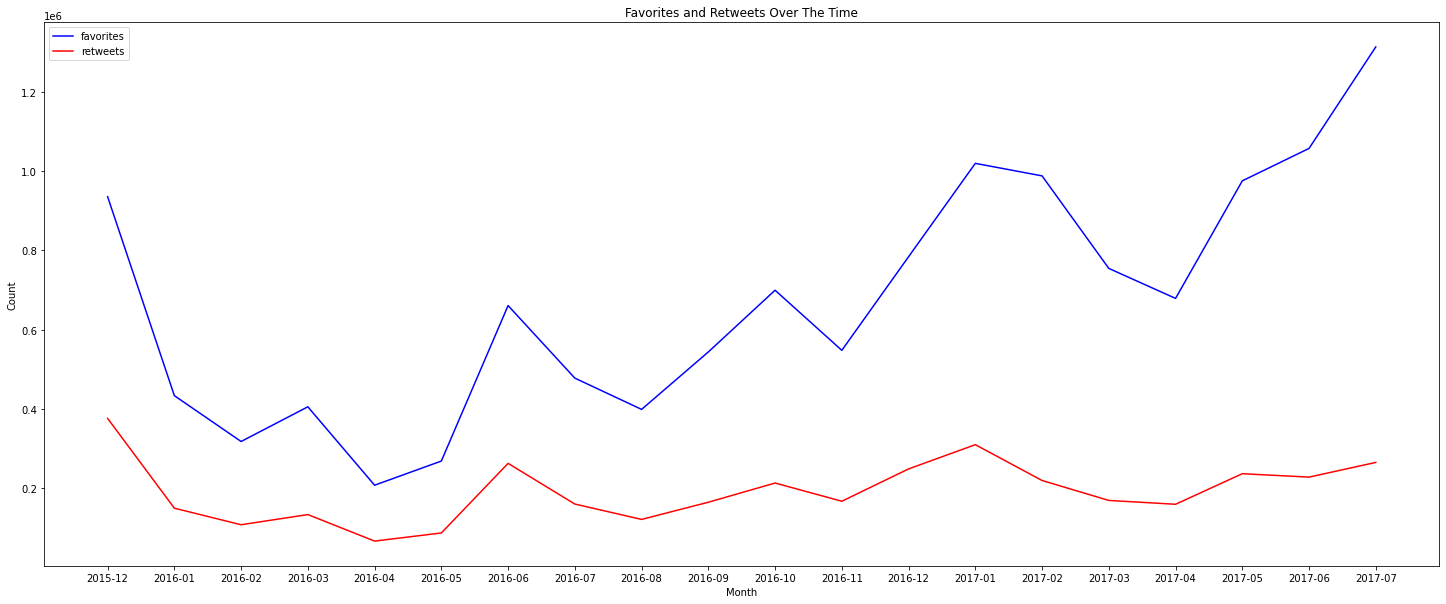

In [286]:
#https://python-graph-gallery.com/122-multiple-lines-chart/
#https://stackoverflow.com/questions/332289/how-do-you-change-the-size-of-figures-drawn-with-matplotlib
plt.figure(figsize=(25,10))
plt.title('Favorites and Retweets Over The Time')
plt.plot( 'Year_month', 'favorites', data=df_sql_analysis,  color='blue')
plt.plot( 'Year_month', 'retweets', data=df_sql_analysis,  color='red')
plt.xlabel('Month')
plt.ylabel('Count')
plt.legend();


### Back to [Analyzing Data](#Analyzing-Data)

### Insight 2

- Highest numbers of favorites came in 2017-7
- Highest numbers of retweets came in 2015-12
- Lowest numbers of favorites came in 2016-4
- Lowest numbers of retweets came in 2016-4
- The page had a huge traffic in 2015-12 and then dropped and came back again in 2017
- It seems like traffic increases in Summer(June and July) and new year holiday in December
- There is a positive correlation between favorites and retweets over the time, yet not always, (example is 2017-7, high number of favorites but slight increase in retweets)

#### Third Insight
   - Get the highest and lowest tweeted dog breed

In [287]:
df_twitter['dog_breed'].value_counts().sort_values()

clumber                   1
EntleBucher               1
Bouvier_des_Flandres      1
silky_terrier             1
standard_schnauzer        1
                       ... 
pug                      62
Chihuahua                89
Pembroke                 94
Labrador_retriever      100
golden_retriever        153
Name: dog_breed, Length: 113, dtype: int64

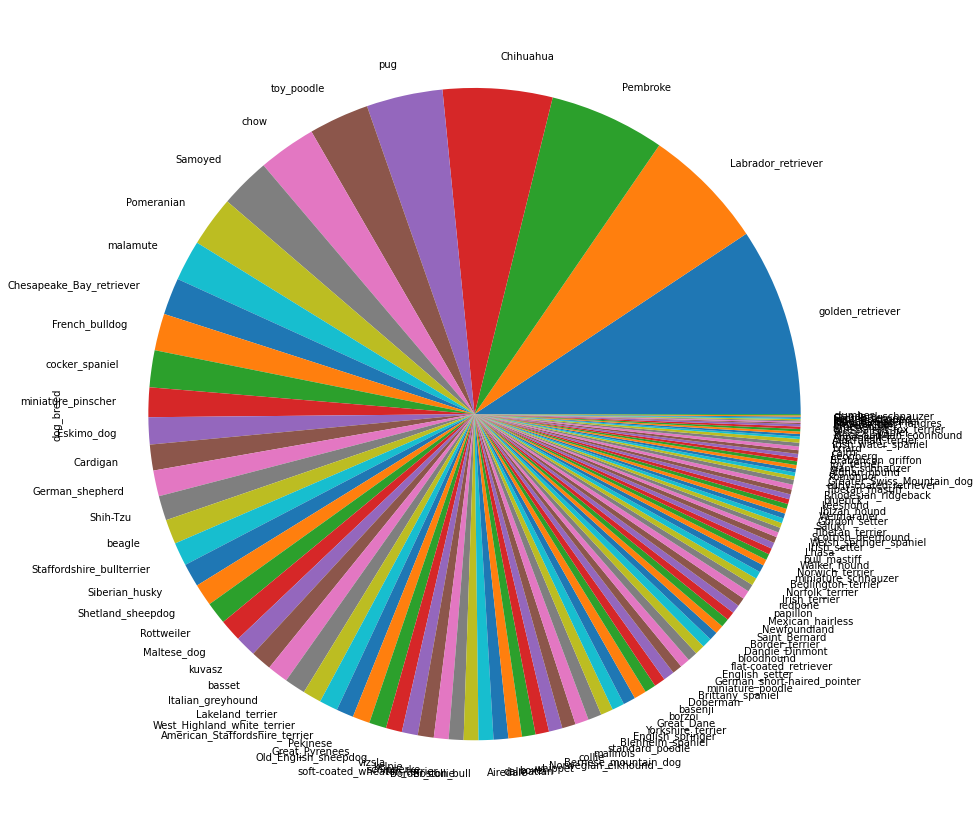

In [288]:
df_twitter[df_twitter['dog_breed'] != 'None']['dog_breed'].value_counts().plot(kind='pie',figsize=(15,15));

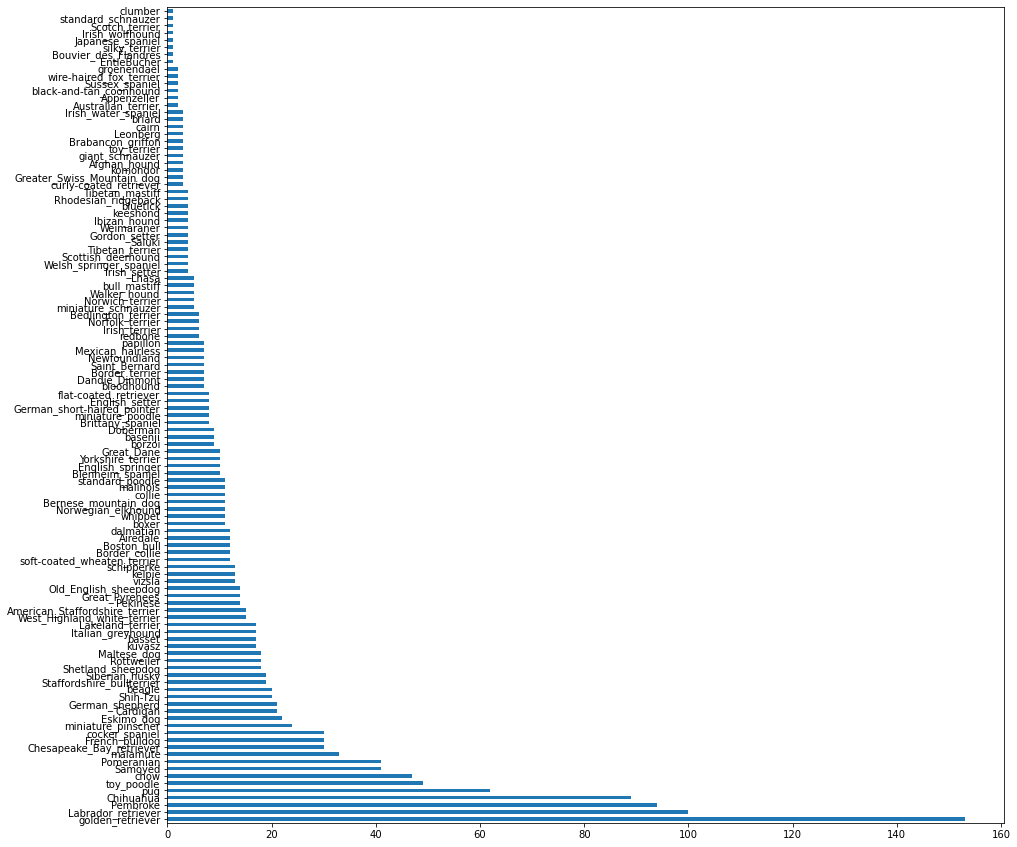

In [289]:
df_twitter[df_twitter['dog_breed'] != 'None']['dog_breed'].value_counts().plot(kind='barh',figsize=(15,15));

In [290]:
# An image sample for golden retriever
df2[df2['dog_breed'] == 'golden_retriever']['jpg_url'].sample(1)

17    https://pbs.twimg.com/media/DFWra-3VYAA2piG.jpg
Name: jpg_url, dtype: object

In [291]:
# # An image sample for clumber
df2[df2['dog_breed'] == 'clumber']['jpg_url'].sample(1)

763    https://pbs.twimg.com/media/Cswbc2yWcAAVsCJ.jpg
Name: jpg_url, dtype: object

### Back to [Analyzing Data](#Analyzing-Data)

### Insight 3

- Golden Retriever is the most common dog breed in tweets
- clumber is the least common dog breed in tweets

#### Fourth Insight
   - Get the highest and lowest tweeted dog types

In [292]:
df_twitter['dog_type'].value_counts().sort_values()

floofer       7
puppo        21
doggo        62
pupper      166
None       1385
Name: dog_type, dtype: int64

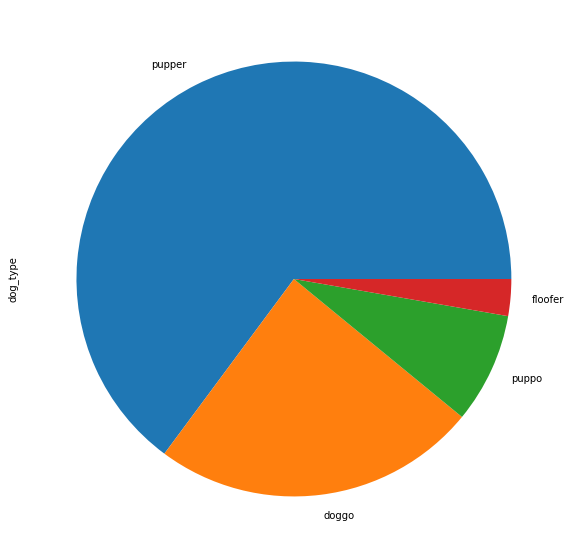

In [293]:
df_twitter[df_twitter['dog_type'] != 'None']['dog_type'].value_counts().plot(kind='pie',figsize=(10,10));

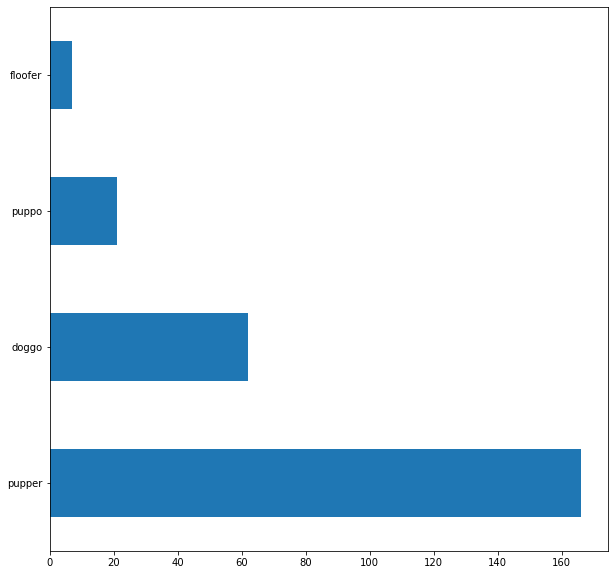

In [294]:
df_twitter[df_twitter['dog_type'] != 'None']['dog_type'].value_counts().plot(kind='barh',figsize=(10,10));

In [295]:
# An image sample for pupper
df2[df2['dog_type'] == 'pupper']['jpg_url'].sample(1)

1250    https://pbs.twimg.com/media/Cd4CBQFW8AAY3ND.jpg
Name: jpg_url, dtype: object

In [296]:
# An image sample for floofer
df2[df2['dog_type'] == 'floofer']['jpg_url'].sample(1)

984    https://pbs.twimg.com/ext_tw_video_thumb/74931...
Name: jpg_url, dtype: object

### Back to [Analyzing Data](#Analyzing-Data)

### Insight 4

- Pupper is the most common dog type in tweets
- Floofer is the least common dog type in tweets

#### Fifth Insight
   - What are the most common dog breed for each dog type tweeted

In [297]:
floofer = df_twitter[df_twitter['dog_type'] == 'floofer']['dog_breed']

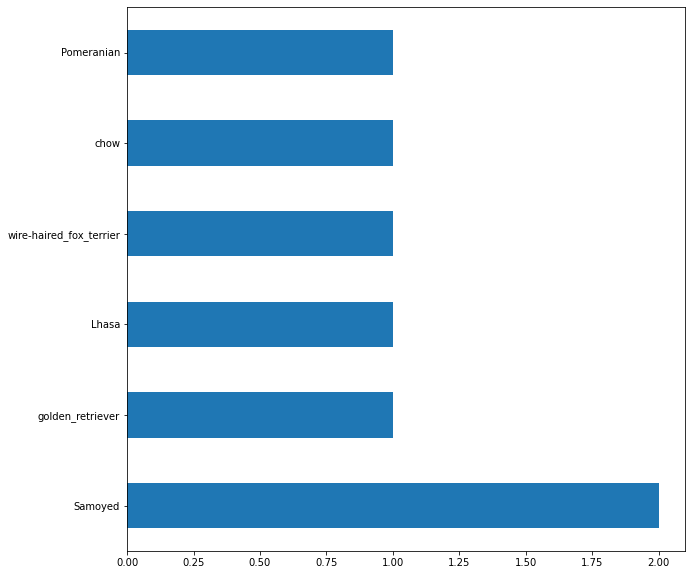

In [298]:
floofer.value_counts().plot(kind='barh',figsize=(10,10));

In [299]:
puppo = df_twitter[df_twitter['dog_type'] == 'puppo']['dog_breed']

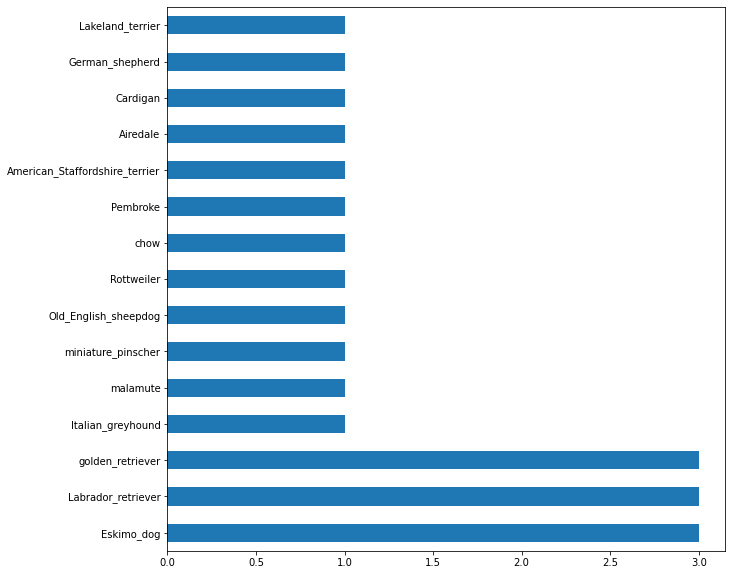

In [300]:
puppo.value_counts().plot(kind='barh',figsize=(10,10));

In [301]:
puppo.value_counts().sort_values()

Italian_greyhound                 1
malamute                          1
miniature_pinscher                1
Old_English_sheepdog              1
Rottweiler                        1
chow                              1
Pembroke                          1
American_Staffordshire_terrier    1
Airedale                          1
Cardigan                          1
German_shepherd                   1
Lakeland_terrier                  1
Eskimo_dog                        3
Labrador_retriever                3
golden_retriever                  3
Name: dog_breed, dtype: int64

In [302]:
doggo = df_twitter[df_twitter['dog_type'] == 'doggo']['dog_breed']

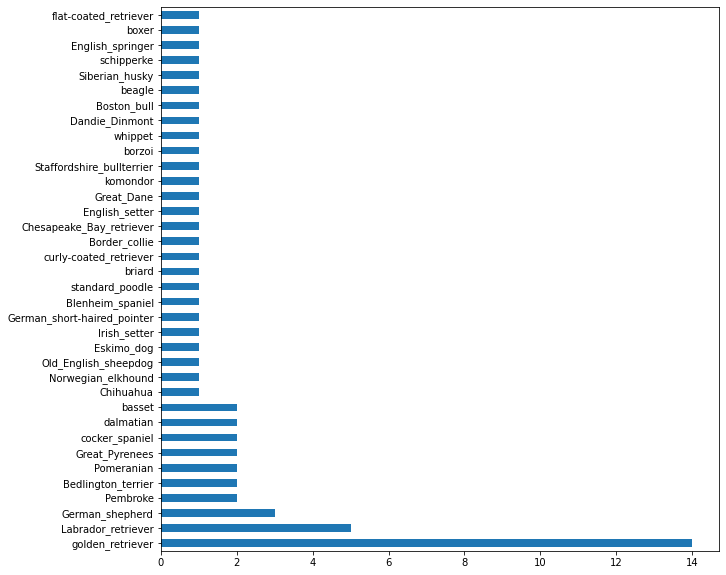

In [303]:
doggo.value_counts().plot(kind='barh',figsize=(10,10));

In [304]:
pupper = df_twitter[df_twitter['dog_type'] == 'pupper']['dog_breed']

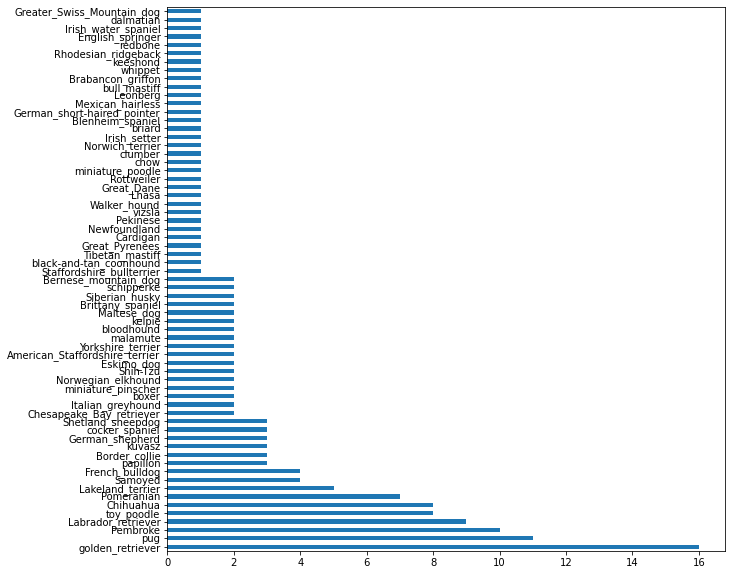

In [305]:
pupper.value_counts().plot(kind='barh',figsize=(10,10));

### Back to [Analyzing Data](#Analyzing-Data)

### Insight 5

- golden retriever is the most common pupper
- golden retriever is the most common doggo
- Eskimo_dog, golden_retriever and Labrador_retriever are the most common puppo
- Samoyed is the most common floofer

#### Sixth Insight
   - Get the highest favorites and retweets by dog_type and dog_breed

In [306]:
breed_details = pd.read_sql("SELECT dog_breed , SUM(favorites) as favorites_count, SUM(retweets) as retweets_count   FROM dograte GROUP BY 1", engine2)

In [307]:
type_details = pd.read_sql("SELECT dog_type , SUM(favorites) as favorites_count, SUM(retweets) as retweets_count FROM dograte WHERE dog_type != 'None' GROUP BY 1", engine2)

In [308]:
max_favorites = breed_details['favorites_count'].max()
breed_details[breed_details['favorites_count'] == max_favorites]

dog_breed  favorites_count  retweets_count
89  golden_retriever        1710312.0        485513.0

In [309]:
max_retweets = breed_details['retweets_count'].max()
breed_details[breed_details['retweets_count'] == max_retweets]

dog_breed  favorites_count  retweets_count
89  golden_retriever        1710312.0        485513.0

In [310]:
max_favorites2 = type_details['favorites_count'].max()
type_details[type_details['favorites_count'] == max_favorites2]

dog_type  favorites_count  retweets_count
0    doggo        1139247.0        380620.0

In [311]:
max_retweets2 = type_details['retweets_count'].max()
type_details[type_details['retweets_count'] == max_retweets2]

dog_type  favorites_count  retweets_count
0    doggo        1139247.0        380620.0

### Back to [Analyzing Data](#Analyzing-Data)

### Insight 6

- Golden retriever is not just the most common dog breed but it's also the most retweeted and favored 
- While pupper is the most common dog type, doggo is the most retweeted and favored 

In [317]:
tweets_json.to_csv('tweets_json.txt', 
                 index=False, encoding = 'utf-8')